# Insights into unicorn companies

## Introduction 

This dataset contains the world of unicorn companies (those valued at over a billion dollars). In this notebook, we explore into a dataset containing information on over 1,000 unicorn companies. This dataset includes details such as industry, country, year founded, and select investors. Our goal is to extract meaningful insights to understand how and when companies reach the prestigious unicorn status, providing valuable recommendations for investing firms.

### Import Necessary Libraries and Load the Dataset

In the initial section, we import essential libraries such as pandas, matplotlib, seaborn, and datetime. We then load the dataset, offering a snapshot of the first 10 rows and providing an overview of its structure through descriptive statistics.

In [88]:
# Import Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [89]:
# Load the dataset 

Dataset = pd.read_csv('Unicorn_Companies.csv')

## Section 1: Data Overview

In [93]:
# View the first 10 rows 

Dataset.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [92]:
# How many rows and column ?

print(f"Number of rows and columns: {Dataset.shape}")

Number of rows and columns: (1074, 10)


In [6]:
# Get basic information from the dataset 

Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


It can be observed that the `Date Joined` column in dataset is object (string) rather than date time

# Section 2: Data Cleaning

Recognizing the importance of data quality, we address issues like the 'Date Joined' column being in object format instead of datetime. We convert it to the appropriate datatype, separate the year, and calculate the time it took for each company to achieve unicorn status.

In [8]:
#Convert the 'Date Joined' column from object to date-time datatype using pandas function 

Dataset['Date Joined'] = pd.to_datetime(Dataset['Date Joined'])

In [9]:
#Affirm it 

print(Dataset.dtypes)

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object


In [10]:
#Separate Year from Date Joined column and create a new column with name 'Year Joined'

Dataset['Year Joined'] = pd.to_datetime(Dataset['Date Joined']).dt.year

In [11]:
#Affirm it 

Dataset.head(5)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


In [12]:
# How much it took for the company to reach Unicorn status 

Dataset['Unicorn Status'] = Dataset['Year Joined'] - Dataset['Year Founded']
Dataset.head(5)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Unicorn Status
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,6


In [13]:
# Basic statistics on Unicorn Status 
Dataset['Unicorn Status'].describe()

count    1074.000000
mean        7.000931
std         5.329672
min        -4.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Unicorn Status, dtype: float64

It can be observed that the year to become unicorn status is negative. This shows that the dataset has a **Global Outlier**

# Section 3: Exploratory Data Analysis (EDA)

In the EDA section, we explore the dataset visually. We analyze the maximum time it took for companies to reach unicorn status across different industries, presenting our findings in a bar plot. Additionally, we investigate the valuation of companies in various industries, gaining insights into their economic impact.

## 1. Plot the maximum time it took for companies to reach unicorn status by industry

In [14]:
#Group the data by Industry 

#grouped = (Dataset[["Industry", "Unicorn Status"]]
         #  .groupby("Industry")
         #  .max()
         #  .sort_values(by="Unicorn Status")
         # )
        
Grouped = Dataset[['Industry', 'Unicorn Status']].groupby('Industry').max().sort_values(by='Unicorn Status')
Grouped

,Unicorn Status
Industry,
Artificial Intelligence,14
Auto & transportation,14
Travel,14
Artificial intelligence,15
Edtech,17
Hardware,18
Mobile & telecommunications,20
"Supply chain, logistics, & delivery",20
Cybersecurity,21


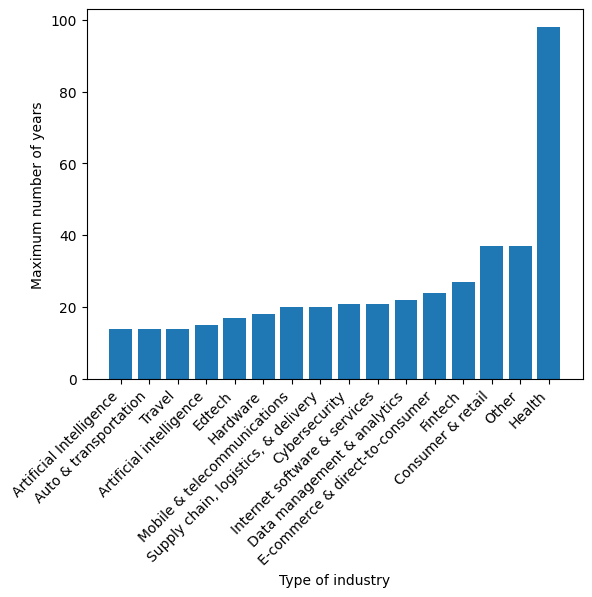

In [15]:
#Visualize the result in the form of bar plot 

plt.bar(Grouped.index, Grouped['Unicorn Status'])
plt.xlabel('Type of industry')
plt.ylabel('Maximum number of years')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

## 2. Plot the valuation per industry

In [16]:
#The valuation column in string datatype, hence, it should be converted to int datatype for mathematical operations. 

def string_to_int(x):
    
    x = x.strip('$BMK') #remove $, B, M, K
    x = int(x)
    
    return x 
#Apply this function in valuation column 

Dataset['Valuation_in_B'] =  Dataset['Valuation'].apply(string_to_int)

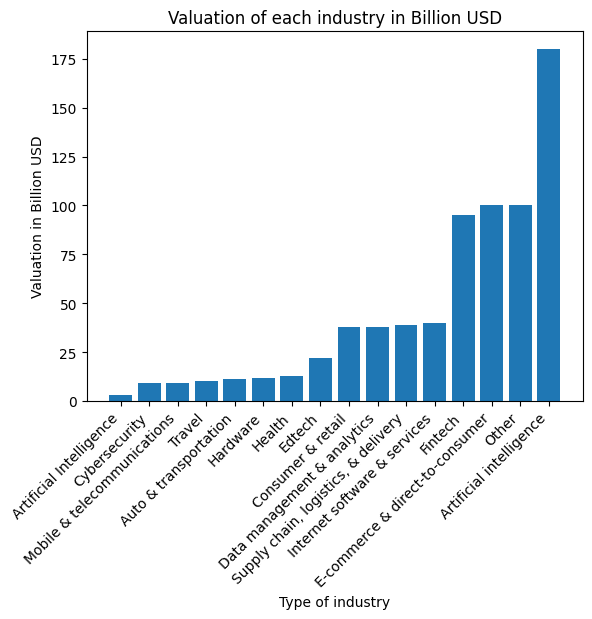

In [17]:
Grouped_Valuation = Dataset[['Industry', 'Valuation_in_B']].groupby('Industry').max().sort_values(by = 'Valuation_in_B')
Grouped_Valuation

plt.bar(Grouped_Valuation.index, Grouped_Valuation['Valuation_in_B'])
plt.title('Valuation of each industry in Billion USD')
plt.xlabel('Type of industry')
plt.ylabel('Valuation in Billion USD')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

# Section 4: Insights from Dataset in Specific Year (2020)

Focusing on a specific year, we explore the given data for 2020. We examine the number of companies achieving unicorn status during each week, providing a temporal perspective on the growth of these companies.

In [53]:
#Filter the dataset for the year 2020

Dataset_within_2020 = Dataset[Dataset["Date Joined"].dt.year == 2020]

Dataset_within_2020.insert(3, "Week Joined", Dataset_within_2020["Date Joined"].dt.strftime('%Y-W%V'), True)

Dataset_by_week_2020 = Dataset_within_2020.groupby(by="Week Joined")["Company"].count().reset_index()


In [55]:
Dataset_by_week_2020

,Week Joined,Company
0,2020-W01,1
1,2020-W02,2
2,2020-W04,4
3,2020-W05,3
4,2020-W06,1
5,2020-W07,2
6,2020-W09,1
7,2020-W10,1
8,2020-W11,1
9,2020-W12,1


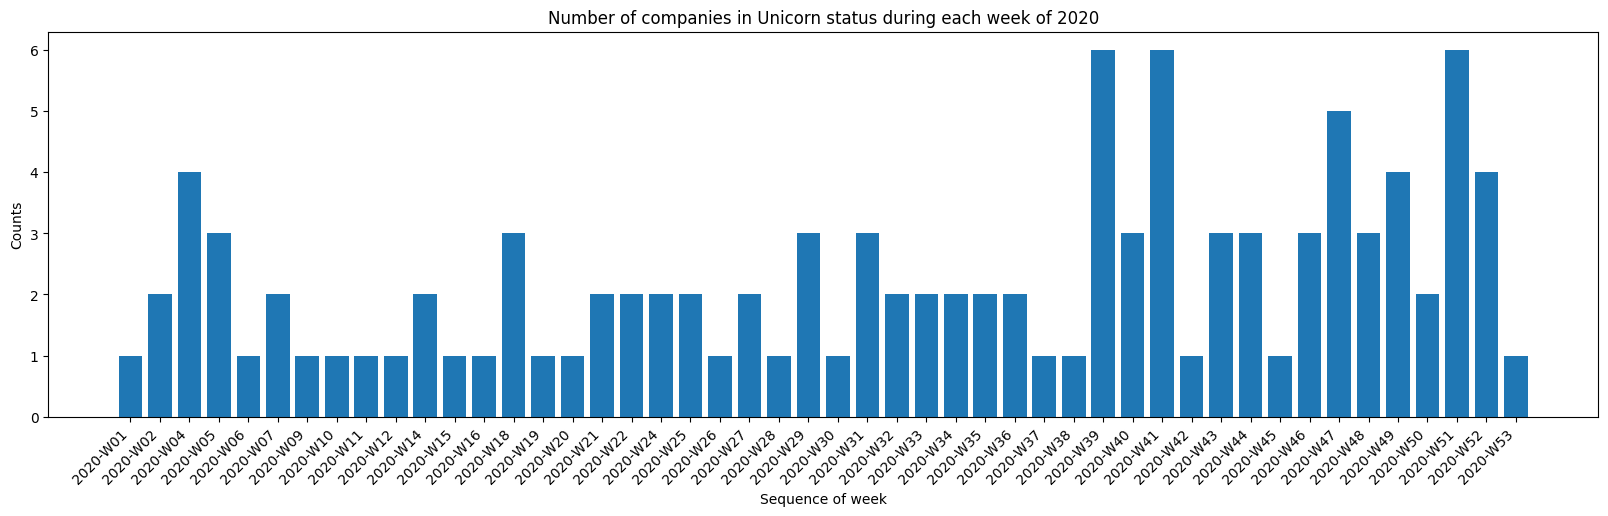

In [64]:
# Plot the number of companies in Unicorn status during each week of 2020

plt.figure(figsize=(20,5))
plt.bar(Dataset_by_week_2020['Week Joined'], Dataset_by_week_2020['Company'])
plt.title('Number of companies in Unicorn status during each week of 2020')
plt.xlabel('Sequence of week')
plt.ylabel('Counts')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

# Section 5: Comparative Analysis of Valuation (2020 vs. 2021)

To understand the evolving landscape, we compare the average valuation of companies in 2020 and 2021 over each quarter. This analysis offers a view of the economics, representing its trends and shifts in investor sentiment.

In [71]:
#Filter date joined that are in 2021

Dataset_2021 = Dataset[Dataset["Date Joined"].dt.year == 2021]

#Concat 2020 and 2021 dataset 

Dataset_2020_2021 = pd.concat([Dataset_2021, Dataset_within_2020.drop(columns="Week Joined")])

# Add `Quarter Joined` column to `Dataset_2020_2021`.

Dataset_2020_2021["Quarter Joined"] = Dataset_2020_2021["Date Joined"].dt.to_period('Q').dt.strftime('%Y-Q%q')



In [77]:
# Group `Dataset_2020_2021` by `Quarter Joined`

Dataset_by_quarter_2020_2021 = Dataset_2020_2021.groupby(by = 'Quarter Joined')['Valuation_in_B'].mean().reset_index()

In [78]:
#Preview the dataframe

Dataset_by_quarter_2020_2021

,Quarter Joined,Valuation_in_B
0,2020-Q1,3.444444
1,2020-Q2,3.777778
2,2020-Q3,3.896552
3,2020-Q4,3.697674
4,2021-Q1,2.750000
5,2021-Q2,2.340278
6,2021-Q3,2.291045
7,2021-Q4,1.850746


In [80]:
Dataset_by_quarter_2020_2021['Quarter'] = Dataset_by_quarter_2020_2021['Quarter Joined'].str[-2:]
Dataset_by_quarter_2020_2021['Year'] = Dataset_by_quarter_2020_2021['Quarter Joined'].str[0:4]

In [81]:
#Preview the dataset 

Dataset_by_quarter_2020_2021

,Quarter Joined,Valuation_in_B,Quarter,Year
0,2020-Q1,3.444444,Q1,2020
1,2020-Q2,3.777778,Q2,2020
2,2020-Q3,3.896552,Q3,2020
3,2020-Q4,3.697674,Q4,2020
4,2021-Q1,2.750000,Q1,2021
5,2021-Q2,2.340278,Q2,2021
6,2021-Q3,2.291045,Q3,2021
7,2021-Q4,1.850746,Q4,2021


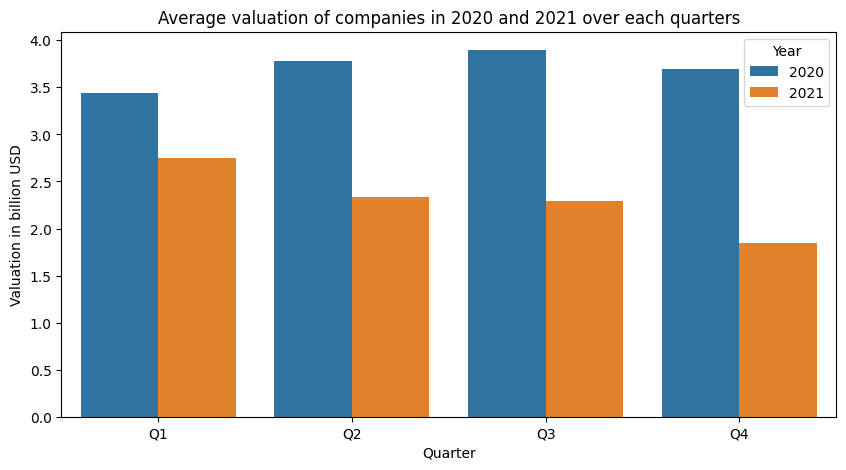

In [86]:
# Plot the average valuation of companies in 2020 and 2021 over each quarter

plt.figure(figsize = (10, 5))
sns.barplot(x = Dataset_by_quarter_2020_2021['Quarter'],
            y = Dataset_by_quarter_2020_2021['Valuation_in_B'], 
            hue = Dataset_by_quarter_2020_2021['Year']
           )

plt.title('Average valuation of companies in 2020 and 2021 over each quarters')
plt.xlabel('Quarter')
plt.ylabel('Valuation in billion USD')
plt.show()

# Section 6: Conclusion

It was discovered that the average valuation of companies that joined in unicorn status in 2020 is tend to increase in each successive quarter, but it was observed to decrease from the fourth quarter of 2020, and it continue to decrease each successive quarters in 2021. 